In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_excel("C:\\Users\\Badru\\Videos\\Internship_hamoyeHQ\\ENB2012_data.xlsx")
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
column_names = {'X1': 'relative_compactness', 
                'X2': 'surface_area',
                'X3' : 'Wall_area',
                'X4': 'roof_area',
                'X5': 'overall_height',
                'X6': 'orientation',
                'X7': 'glazing_area',
                'X8': 'glazing_area_distribution',
                'Y1': 'heating_load',
                'Y2': 'cooling_load'}
df_data = data.rename(columns = column_names)
df_data.head()

,relative_compactness,surface_area,Wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# miss_d = {'Wall_area': 'wall_area'}
w_data = df_data.rename(columns =  {'Wall_area': 'wall_area'})
w_data.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<Axes: xlabel='heating_load', ylabel='cooling_load'>

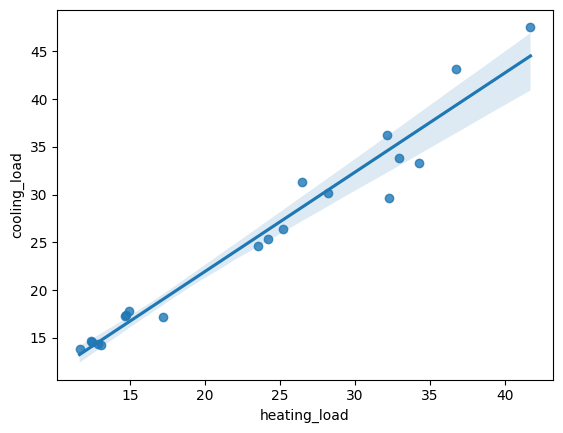

In [5]:
df = df_data[['heating_load', 'cooling_load']].sample(20, random_state = 2)
# df_data[x = relative_compactness, y = cooling_load]
sns.regplot(data =  df, x = 'heating_load', y = 'cooling_load')



# sns.regplot

In [6]:
w_data.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<Axes: xlabel='x_plot', ylabel='y_plot'>

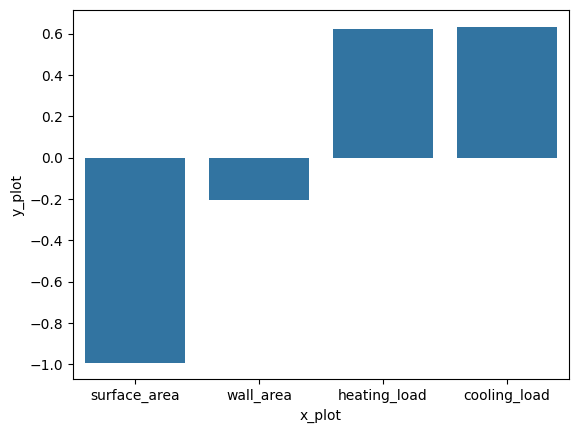

In [7]:
df_corr = ['relative_compactness','surface_area','wall_area','heating_load', 'cooling_load' ]
corr_values = w_data[df_corr].corr()['relative_compactness']
data_dict =  {'x_plot': df_corr[1:],
'y_plot': corr_values[1:]}
sns.barplot(data = data_dict, x = 'x_plot', y = 'y_plot')

#### Measuring Regression Performance

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df_data), columns = df_data.columns)
# print(normalised_df)
features_df = normalised_df.drop(columns = ['heating_load', 'cooling_load'])
heating_target =  normalised_df['heating_load']
heating_target

0      0.257212
1      0.257212
2      0.257212
3      0.257212
4      0.399838
         ...   
763    0.320032
764    0.283904
765    0.281208
766    0.282286
767    0.286600
Name: heating_load, Length: 768, dtype: float64


#### Mean Absolute Error (MAE)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(features_df, heating_target, test_size = 0.3, random_state = 1)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae =  mean_absolute_error(y_test, predicted_values)
round(mae, 3)


0.063

#### R-Squared

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np
rm_se = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rm_se, 3)

0.089

#### Penalization method

In [11]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

#### Lasso Regression and Elastic net

In [16]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

# Comparing effects of regularization
def get_weights_df(model, fts, col_name):
    weights = pd.Series(model.coef_, fts.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_model_weights')
lasso_model_weights = get_weights_df(lasso_reg, x_train, 'Lasso_model_weights')
ridge_model_weights =  get_weights_df(ridge_reg, x_train, 'Ridge_model_weights')

final_weights =  pd.merge(linear_model_weights, lasso_model_weights, on = 'Features')
last_weight = pd.merge(final_weights, ridge_model_weights, on = 'Features')
last_weight

,Features,Linear_model_weights,Lasso_model_weights,Ridge_model_weights
0,surface_area,-5.476937e+12,0.000000,-0.062275
1,relative_compactness,-5.838828e-01,-0.027719,-0.283471
2,orientation,2.635956e-03,0.000000,0.003369
3,glazing_area_distribution,2.693367e-02,0.021431,0.029088
4,glazing_area,2.147865e-01,0.206132,0.212449
5,overall_height,3.945312e-01,0.463482,0.442467
6,Wall_area,3.194880e+12,0.200087,0.103061
7,roof_area,4.107703e+12,-0.000000,-0.163192
